# Predicting Energy Consumption
## Final Report
### Machine Learning 2021/2022
#### Mariana Nunes, 0591443

### Table of Contents
1. Introduction
2. Handle Data<br>
    2.1. Problem & Data Analysis/Visualization<br>
    2.2. Data Preprocessing & Feature Selection<br>
    2.3. Data split strategy: training, validation and test <br>
    2.4. Considerations <br>
    <br>
3. Linear Regression <br>
    3.1 Training and Tuning the Model<br>
    3.2 Analysis of performance and errors<br>
    3.3 Improving performance<br>
    <br>
4. Decision Tress - Random Forest<br>
    4.1 Training and Tuning the Model<br>
    4.2 Analysis of performance and errors<br>
    4.3 Improving performance<br>
    <br>
5. Neural Network <br>
    5.1 Training and Tuning the Model<br>
    5.2 Analysis of performance and errors<br>
    <br>
6. Evaluating Different Hypotheses & Model selection 
7. Kaggle submission

## 1. Introduction

The aim of this project is to **build a good regression model that predicts the energy consumption in a household**. <br>
For this, three different models will be trained, descripted and analyzed: **Linear Regression**, **Decision Trees** (Random Forest) and **Neural Network** (Long Short-Term Memory Network). Based on their performance evaluation, the one that best suits this problem will be selected.<br> 
The strategy to follow will be:

1. Problem and data analysis
2. Data processing and features extraction
3. Data splitting in 3 sets: training, validation and test
4. Model training and hyperparameter tuning 
5. Analysis of model performance and error
6. Repeat step 4 to get a better performance
6. Train other models (repeat steps 4 to 6 for other model)
7. Model selection

The different packages and libraries that will be used in this project are: numpy, pandas, scikit-learn, matplotlib and seaborn.

In [1]:
# import the libraries and packages
import numpy as np # numerical library
import pandas as pd # data manipulation library
import sklearn # scikit-learn machine learning library
import matplotlib.pyplot as plt # plotting
%matplotlib notebook 
import pylab as pl
%matplotlib inline
import seaborn as sb # seaborn for plotting and styling
import sys
import os 
import glob
import time

## 2. Handle Data
### 2.1 Problem & Data Analysis/Visualization
We want to train a model to predict the energy consumption in a household (in Wh), named in the data sets as **Appliances**. The predictions are going to be based on different data sources and environmental parameters. The features available in the datas sets are descripted in the table below:

| Feature || Description || Unit |
| :- || :- || :- |
| date time stamp. || year-month-day || hour-minute-second |
| lights || energy use of light fixtures in the house || Wh |
| T1 || Temperature in kitchen area || Celsius |
| RH_1 || Humidity in kitchen area || % |
| T2 || Temperature in living room area || Celsius |
| RH_2 || Humidity in living room area || % |
| T3 || Temperature in laundry room area || Celsius |
| RH_3 || Humidity in laundry room area || % |
| T4 || Temperature in office room || Celsius |
| RH_4 || Humidity in office room || % |
| T5 || Temperature in bathroom || Celsius |
| RH_5 || Humidity in bathroom || % |
| T6 || Temperature outside the building (north side) || Celsius |
| RH_6 || Humidity outside the building (north side) || % |
| T7 || Temperature in ironing room || Celsius |
| RH_7 || Humidity in ironing room || % |
| T8 || Temperature in teenager room 2 || Celsius |
| RH_8 || Humidity in teenager room 2 || % |
| T9 || Temperature in parents room || Celsius |
| RH_9 || Humidity in parents room || % |
| To || Temperature outside (from weather station) || Celsius |
| Pressure || Pressure outside (from weather station) || mm Hg |
| RH_out || Humidity outside (from weather station) || % |
| Wind speed || Wind speed (from weather station) || m/s |
| Visibility || Visibility (from weather station) || km |
| Tdewpoint || Dew point (from weather station) || Celcius |
| rv1 || random variable || nondimensional |
| rv2 || random variable || nondimensional |



Two different data sets were initially given: one labeled set, the "train_data", that will be used to train the model, and one unlabeled set, the "test_data", that will be used to evaluate the final model on Kaggle. Let's start by import the given data sets:

In [2]:
#import data sets
train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

#extract out the values for the features and label and save them as arrays
X = train_data.iloc[:,:-1].values
y = train_data['Appliances'].values

#get number of instances and features
num_inst = X.shape[0] 
num_feat = X.shape[1] 
print('number of features:', num_feat)
print('number of training instances:', num_inst)

number of features: 28
number of training instances: 15000


Now, let's **vizualize the data**  to understand what type of problem this is and to identify what preprocessing actions can be taken to optimize the model training: <br>
(note: the tables and figures captions can be found in comments)

In [4]:
#Table 1: features values of the first 5 instances in the train set
train_data.head()


,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances
0,2016-01-11 17:00:00,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,60
1,2016-01-11 17:10:00,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,60
2,2016-01-11 17:20:00,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,50
3,2016-01-11 17:30:00,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,50
4,2016-01-11 17:40:00,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,60


<IPython.core.display.Javascript object>


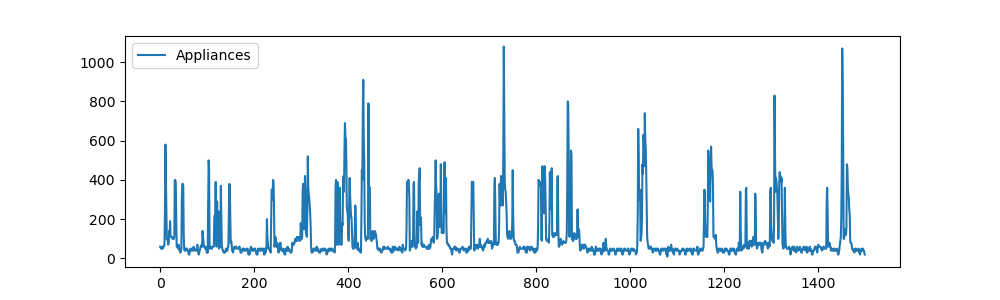

<AxesSubplot:>

In [5]:
#Fig 1: Appliances of the first 1500 datapoints in the training set
train_data[0:1500].plot(y="Appliances",figsize=(10,3))


<IPython.core.display.Javascript object>


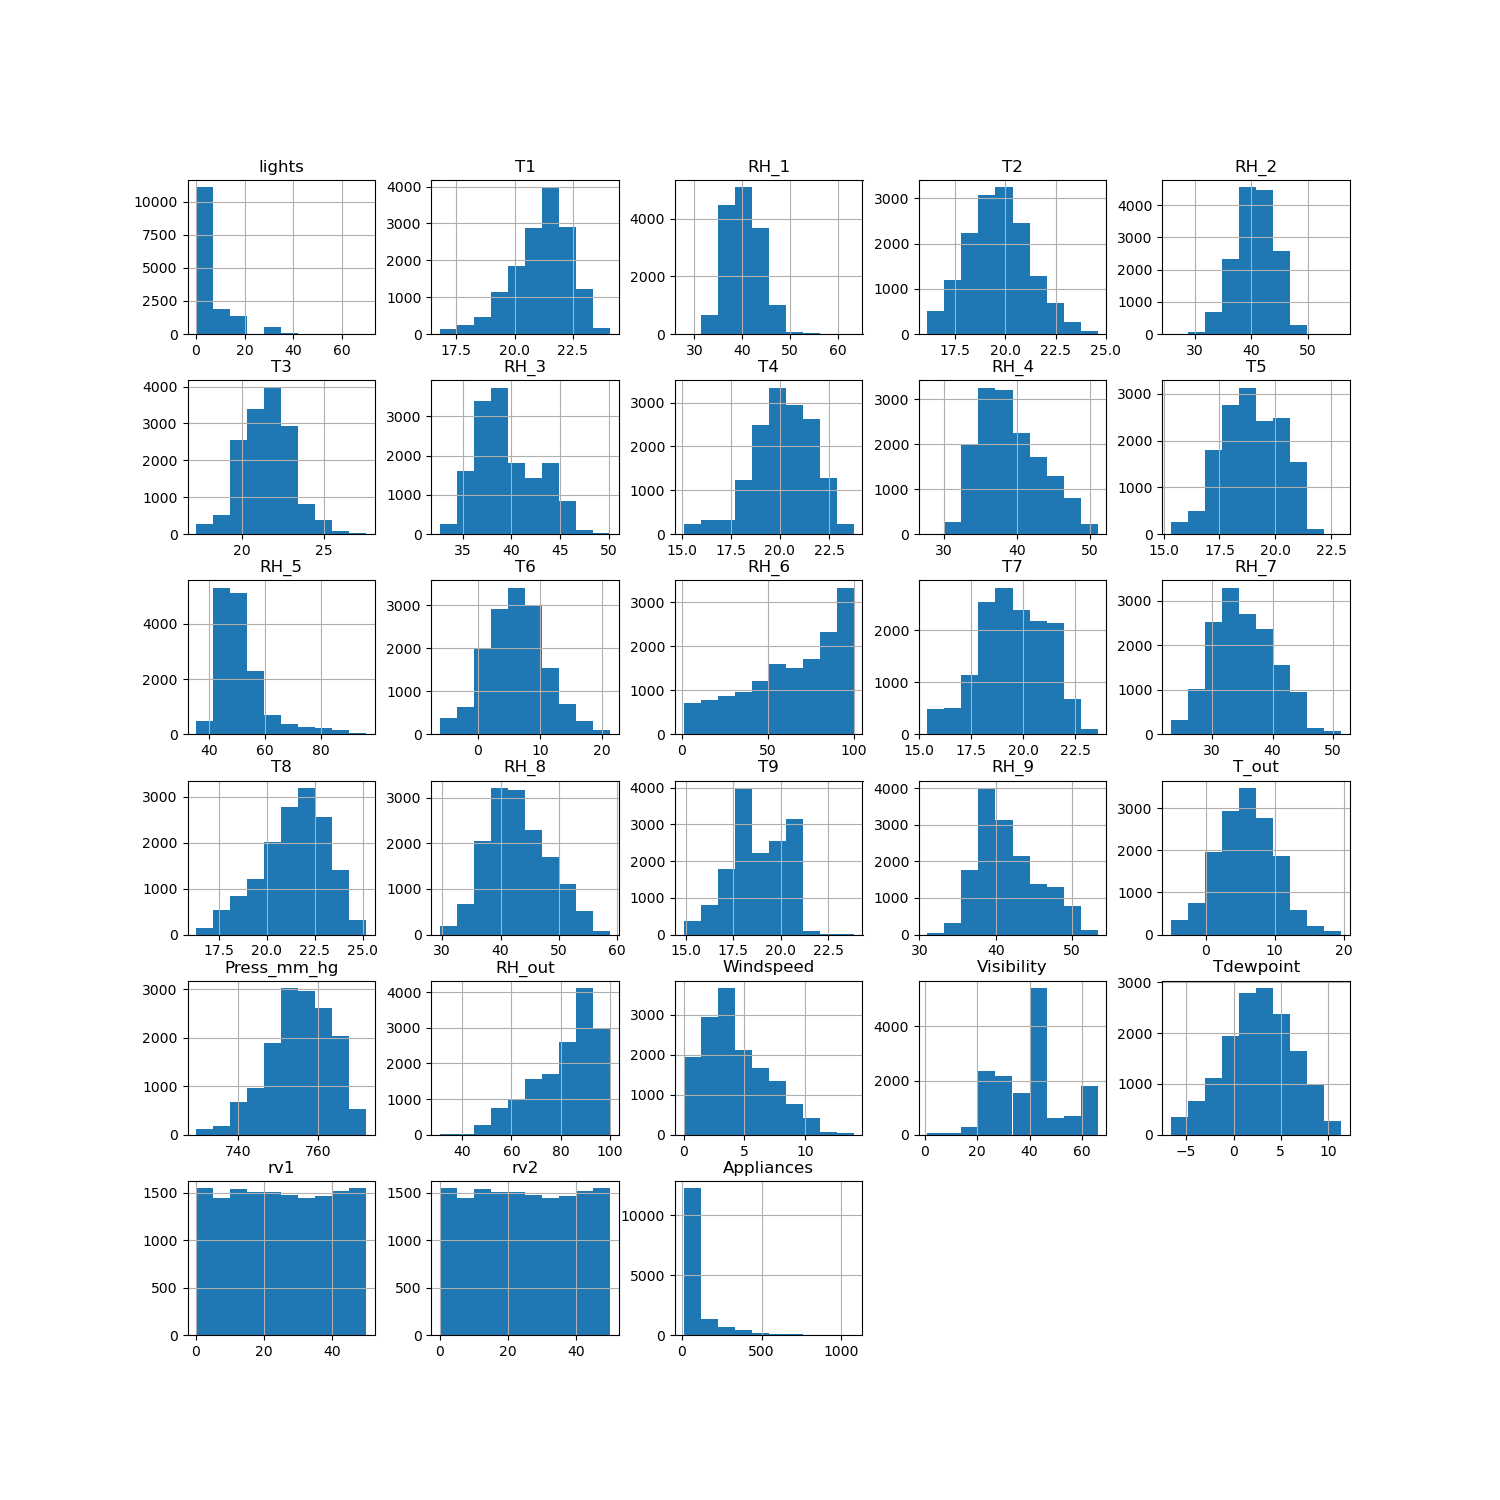

In [6]:
#Fig.2: distribution of the features&target values
train_data.hist(figsize = (15,15))
plt.show()

<IPython.core.display.Javascript object>


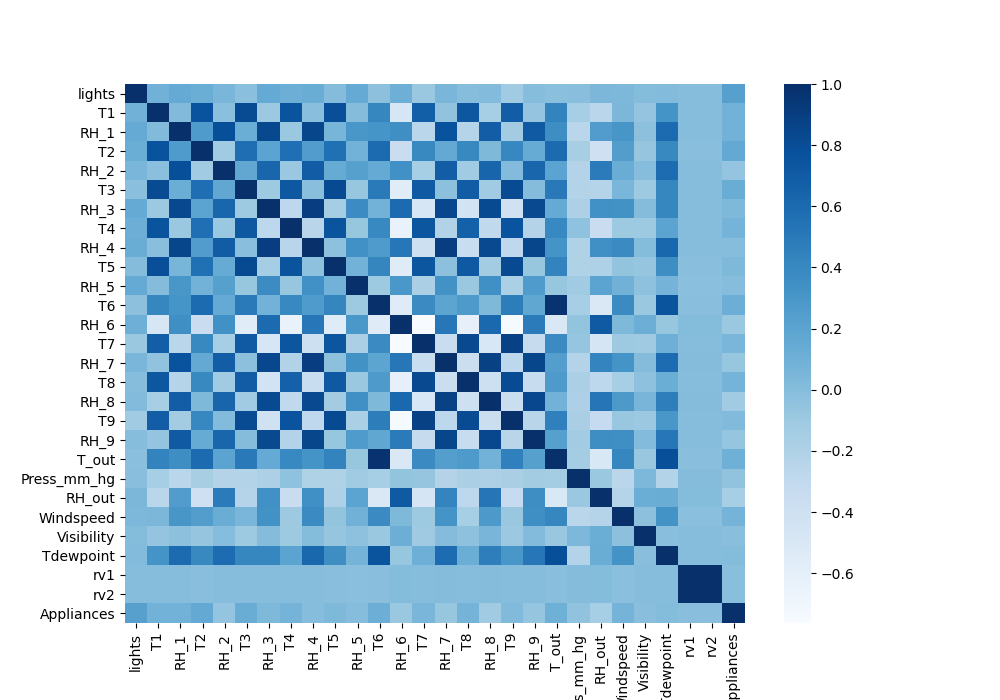

<AxesSubplot:>

In [7]:
#Fig.3: correlation matrix - relations between features and between each feature and target 
plt.figure(figsize=(10,7)) 
sb.heatmap(train_data.corr(),  #determine correlation between features
             cmap='Blues') #nice colos

<IPython.core.display.Javascript object>


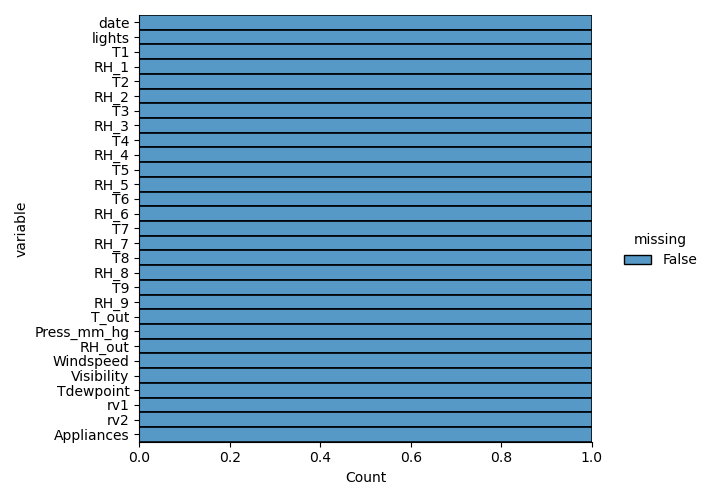

In [8]:
#Fig.4: Proportion of missing data for each feature and target in the data

#isna() is a boolean Pandas function. The output is True for missing data and False for the NOT missing data
#blue is false, orange is true
sb.displot(
    data=train_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

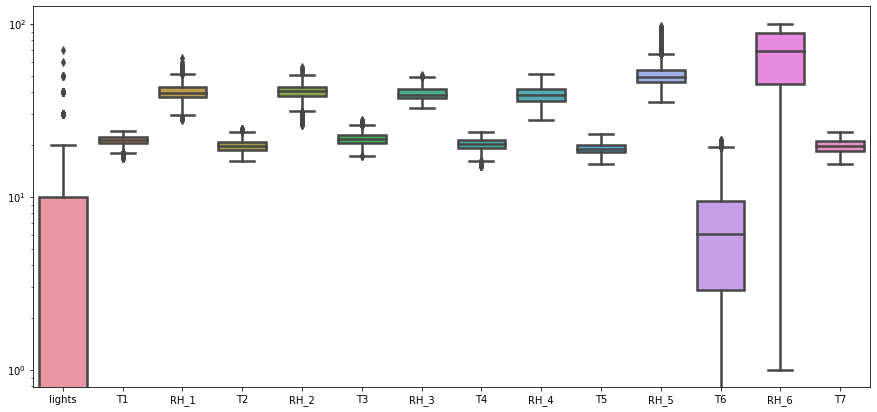

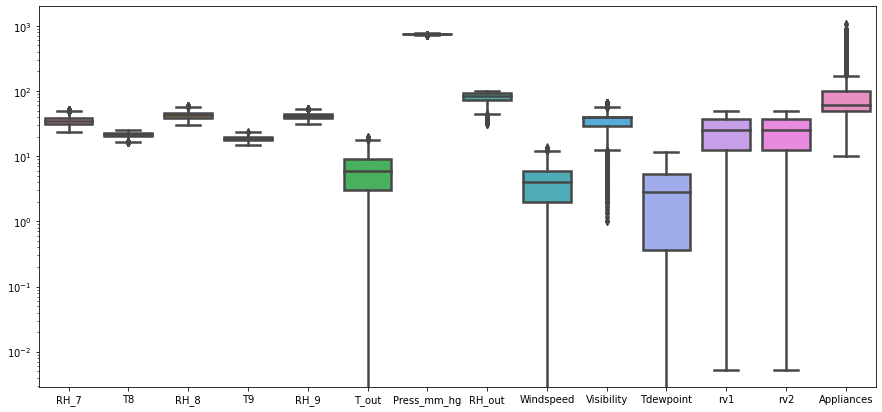

In [13]:
# Fig. 5 box plot to show distributions for the first 14 features
fig1, ax = plt.subplots(figsize=(15,7))
g1 = sb.boxplot(data=train_data.iloc[:,:15],linewidth=2.5,ax=ax)
g1.set_yscale("log")

# Fig. 6 box plot to show distributions for the first 15 features
fig2, ax = plt.subplots(figsize=(15,7))
g2 = sb.boxplot(data=train_data.iloc[:,15:],linewidth=2.5,ax=ax)
g2.set_yscale("log")

In table 1, we see the features have different scales, so **features normalization** will be needed. In this table we can also see that we have a time-based data, so we have to be careful while training the model and **don't make a random slipt of the data set** and we will have to **create a feature from this time variable**. <br>

From figure 1, we can observe the target values are very large, which makes this is a **regression problem**. <br>

In figure 1 one we see that some features have a distribution close to the **Gaussian**, and other don't.

Figure 3 shows the correlations between features and between each feature and the target value. We can cleary see in the figure that some attributes are strongly  correlated or anticorrelated (correlation=1 or =-1), which means they contain the same information. Consequently, we will need to perform **feature selection**, because all the features won't be needed to train the model.<br>

Notice that rv1 and rv2 not only have a correlation=1 but also have the same values distribution (according to figure 2), which means they are very likely to be **repeted attributes** in the data set, and one can of them can be deleted.<br>

In the last row/column of figure 3, we see there is no high correlation between the features and target, so a **linear relationship** may not exist between them.

Figure 4 shows us that there is **no missing data**.

Finaly, in figures 5 and 6, we can see there are some **outliners values** that can be removed. <br>

### 2.2 Data Preprocessing & Feature Selection

####  Creating a new feature from the time variable 


In [3]:
def create_time_features(df)  :  
    import datetime
    
    if df.shape[1]  == 29:
        df.pop('Appliances')

    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
    df['month'] = pd.DatetimeIndex(df['date']).month
    df['day'] = pd.DatetimeIndex(df['date']).day
    df['hour'] = pd.DatetimeIndex(df['date']).hour
    df['minutes'] = pd.DatetimeIndex(df['date']).minute
    df['weekday'] = pd.DatetimeIndex(df['date']).weekday

    df.pop('date')
    num_feat = df.shape[1] #update number of features

    return df.values, num_feat

X, num_feat = create_time_features(train_data)

#### Outliers 
Outliers are unexpected values, usualy caused by mesurement erros or noise, that can have a negative impact in the model performance. In the previous section we could observe with the box plot that there are some outliners in our data. Now, let's use other tecnique to identify them:

In [50]:
#identifying outliers using a 99% percentile-based approach 
#it will be only used for features with a distribution that looks close to the Gaussian
#rem ove them
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

instances_with_outliners = []
for n in range(num_feat):
    feat_n_values= X[:,n] 
    feat_n_mean, feat_n_std = mean(feat_n_values), std(feat_n_values)
    lower, upper= feat_n_mean - feat_n_std * 3, feat_n_mean + feat_n_std * 3
    # identify outliers
    outliers_count = 0
    j=0
    for i in range(feat_n_values.size):
        if feat_n_values[i] < lower or feat_n_values[i] > upper:
            outliers_count += 1
            if i not in instances_with_outliners and n != 0 and n != 10:
                instances_with_outliners =instances_with_outliners +[i]
    print(outliers_count,'Identified outliers in feature', n+1)

600 Identified outliers in feature 1
110 Identified outliers in feature 2
59 Identified outliers in feature 3
20 Identified outliers in feature 4
41 Identified outliers in feature 5
65 Identified outliers in feature 6
10 Identified outliers in feature 7
120 Identified outliers in feature 8
0 Identified outliers in feature 9
2 Identified outliers in feature 10
428 Identified outliers in feature 11
17 Identified outliers in feature 12
0 Identified outliers in feature 13
0 Identified outliers in feature 14
38 Identified outliers in feature 15
0 Identified outliers in feature 16
0 Identified outliers in feature 17
7 Identified outliers in feature 18
0 Identified outliers in feature 19
39 Identified outliers in feature 20
60 Identified outliers in feature 21
57 Identified outliers in feature 22
45 Identified outliers in feature 23
3 Identified outliers in feature 24
0 Identified outliers in feature 25
0 Identified outliers in feature 26
0 Identified outliers in feature 27
0 Identified outli

For some features, as feature 1, we indentified many outliners. Instead of deleting the outliners, which could reduce the data set to much, let's transform the values by Scaling to reduce the variation caused by them.

#### Scaling: normalization 
To perform normalization, we will scale the input values individually to unit norm. Normalization can be useful in algorithms that do not assume any distribution of the data, like Neural Networks, or in models very sensitive to the scale of features, such as decision trees. <br>

In [6]:
#Note: normalization can be done directly with the linear regression model 
#parameter "normalise", whose value will be determined in the tuning

def normalize_inst(x):
    from sklearn.preprocessing import Normalizer
    
    scaler = Normalizer()
    new_x = scaler.fit_transform(x)
    new_x = pd.DataFrame(new_x)
    return new_x

#### Feature selection
The feature selection can help us to reduce over-fitting and the computational cost, and it can improve the model's accurancy. 
It depends on the  attributes and features of the dataset, and, as we identified from the correlation matrix, there are some features with the same information, and two repeted features (one of them will be removed). To perform the feature selection, we will use different methods, depending on the model we are trainning. <br>
For the Linear Regression model, we will use the Pearson’s method because we have numerical inputs and outputs. <br>
For the Decision Trees and Neural Networks, the feature selection process will be explained while training the model.

In [4]:
#remove repeated feature
def remove_repeated_feat(X, num_feat):
    X = np.delete(X, 27, 1)#remove the repetead feature 
    num_feat = num_feat -1 #update number of features
    return X, num_feat

X, num_feat = remove_repeated_feat(X, X.shape[0])

In [5]:
#feature selection using the Pearson’s method
#this function will be called after we have a base model for the Linear Regression Model 
#to determine the feature selection that leads to an optimal performance of the model
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def feat_select_linReg(X, y, model):
  
    num_feat= X.shape[1] 
    v_scores = np.zeros(num_feat)
    for i in range(num_feat):
        #define feature selection
        fs = SelectKBest(score_func=f_regression, k=i+1)
        # apply feature selection
        X_selected = fs.fit_transform(X, y)

        X_train, X_test, y_train, y_test = split_data_25 (X_selected,y)

        model.fit(X_train,y_train)
        scores = cross_val_score(model, X_train, y_train, cv=tscv)
        v_scores[i] = scores.mean()
    
    
    plt.figure()
    plt.plot(np.arange(num_feat),v_scores)
    plt.show()

    n_best_features = np.argmax(v_scores)
    print("Optimal performance of ", v_scores[n_best_features],", for ", n_best_features+1, " features")
    
    #to know which features were removed
    fs = SelectKBest(score_func=f_regression, k=n_best_features+1)
    X_selected = fs.fit_transform(X, y)
    print("Features selected (true if selected, false otherwise):",fs.get_support())

### 2.3 Data split strategy: training, validation and test 

Now, let's devide the given labelled set (the called "train_data") in training, validation and test sets. The **trainning set** wil be used to train the model, and the **test set** to evaluate it (this one is different from the one used to test the model on Kaggle!). The **validation set** has two purposes: first, is to test the model with a data set that wans't used to build it, which allows us to avoid overfitting due to a bad generalization of the model and secondly, it is used for a better hyperparameter selection.<br>

In [6]:
from sklearn.model_selection import train_test_split
def split_data_25 (X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.25,  #25% for the test set
                                                        random_state=0)  
    return  X_train, X_test, y_train, y_test 
                                                     
X_train, X_test, y_train, y_test =split_data_25 (X,y)

In order to avoid overfitting due to a not properly randomised split and to avoid not getting an optimal hyperparameter selection due to a small validation set, **cross-validation** will be performed. This means the training data set is going to be divided in K equal parts (the folds), one of the K parts will be used for validation and the other K-1 parts for training. This process is repeted K-times, and each time, the part used for validation is always a different one.<br>
The cross-validation score is the average model performance accross all K trained models, each one evaluated on their validation set. Once the optimal hyperparameters are chosen (using cross-validation as well), the model is retrained with all training data.<br>
For this project, the method that will be used for cross-validating is **cross-validation on a rolling basis** to preserve the temporal dependency between instances and avoid future-looking while training the model. This method starts  with a small subset of data for training purpose, then forecasts for the later data points and finally checks the accuracy for the forecasted data points. The same forecasted data points are then included as part of the next training dataset and subsequent data points are forecasted. We are going to use this when optimizing the hyperparameters of a model and when comparing and selecting a model: <br>

In [7]:
#tscv will be used to evaluate and tuning the models in the next sections
import numpy as np
from sklearn.model_selection import TimeSeriesSplit

ts= int(0.15*X_train.shape[0])
tscv = TimeSeriesSplit(n_splits=5, test_size=ts) #5 folders, test size is 15% of the trainning datadata


### 2.4 Considerations
1. What would have been different if we'd have split the data in a random fashion? How would this influence the way you build your models? Would you be more limited? What about data distributions?

If we had split the data in a random fashion, data-leakage would happen and the model could get an exaggerate performance,  because it would memorize the training data.
This would happen because the  target and the features are temporally autocorrelated, i.e., its values at one certain moment are expected to be similar to the values at the previous moment, and our data instances are just 10min apart!
We would be more limited because the random fashion would cause training and validation data to be dependent. A solution could be resort to cross-validation strategies for data with temporal structure. To train the models in the next sections, cross-validation will be performed on a rolling basis. Like this, the temporal dependency realation between instances is preserved during testing.

2. Think about this time component and what extra information/benefit this could offer you in terms of features and models. Did you implement this? How?

The time component give us an extra information, once the energy consumption varies throughout the day, the week and the seasons, for exemple, energy consumption is expected to be lower during the morning and higher during the night (as shows figure 5). 
To take advantage of this, four new features were created from the time variable, one for the month, day, hour, minutes and weekday. This was done in the previous subsection.

<IPython.core.display.Javascript object>


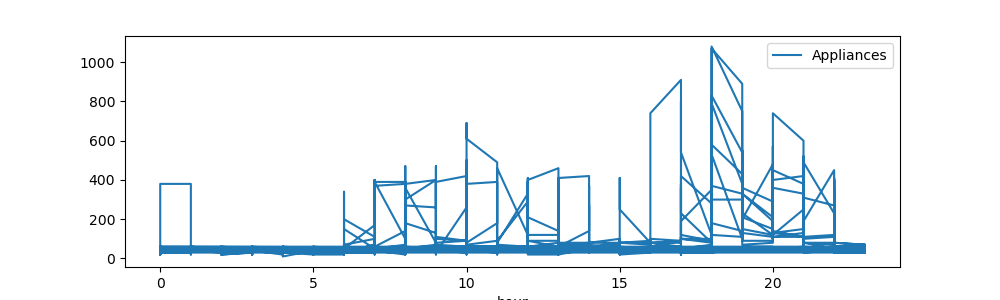

<AxesSubplot:xlabel='hour'>

In [20]:
#Fig 7: Appliances as function of a day hours
import datetime
df = pd.read_csv("./train.csv")
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['hour'] = pd.DatetimeIndex(df['date']).hour
df[0:1500].plot( x='hour', y="Appliances",figsize=(10,3))

## 3.  Linear Regression Model
### 3.1 Training and Tuning the Model
Now, we are going to build a linear regression model. This is a simple model that assumes the features, $x_i$, have a linear relationship with the target, $y$:
\begin{equation}
\hat{Y} = h_{\theta}(X) = \sum_{i=0}^{d} (\theta_i*x_i)
\end{equation}
where  $\theta$ are the regression coefficients.
To train this model is to find the best coefficients that suit the problem:

In [24]:
#import linear regression model
from sklearn.linear_model import LinearRegression

#create a model instance (a model object that can be trained, tuned and used)
linreg0 = LinearRegression()

#train the model on the training data
linreg0.fit(X_train,y_train)

#predict the targets for test data 
y_pred0 = linreg0.predict(X_test)

#calculate the accuracy of the model on the train set and on the test set
train_score0 = linreg0.score(X_train, y_train)
test_score0 = linreg0.score(X_test, y_test)
print("Training Accuracy :", train_score0)
print("Test Accuracy :", test_score0)

Training Accuracy : 0.18085291356654332
Test Accuracy : 0.1682948176730218


#### Optimize the model (cross validation and hyperparameter tuning)
To determine the optimal parameters of the model, we will do an exhaustive search for specifying the parameter values with Grid Search.

In [214]:
#HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

# parameter grid
parameters = {
    'fit_intercept' : [True,False], 
    'normalize' : [True,False],
    'positive' : [True,False],
    'copy_X' : [True,False],
    'n_jobs' : [ -10, -5,-1,0,1,5,10],
}

#use GridSearchCV to find hyperparameters that best fit the data according 
#to the scoring metric that you want your model to optimize on.
model = GridSearchCV(LinearRegression(),               # model
                   param_grid = parameters,   # hyperparameters
                   scoring='r2',              # metric for scoring
                   cv=tscv )    # TimeSeriesSplit, 10 folders

model.fit(X_train,y_train)
train_score = model.best_score_
#Print  the tuned-hyperparameters and the training accuracy
print("Tuned Hyperparameters :", model.best_params_)
print("Training Accuracy :", train_score)

Tuned Hyperparameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': -10, 'normalize': False, 'positive': False}
Training Accuracy : 0.17257767009478248


In [25]:
from sklearn.model_selection import cross_val_score

def tune_linReg_model (X, y):
 
    #split the data
    X_train, X_test, y_train, y_test =split_data_25 (X,y)
    
    #TRAIN: build the model with the values of the hyperparameters returned by the GridSearchCV() function
    linreg = LinearRegression(copy_X= True, 
                                fit_intercept=False,
                                n_jobs=-10, 
                                normalize=True, 
                                positive= False)

    linreg.fit(X_train,y_train)
    train_score = linreg.score(X_train, y_train)
    print("Train accuracy: ",train_score)

    #VALIDATION: perform cross validation with TimeSeriesSplit 5 folders
    scores = cross_val_score(linreg, X_train, y_train, cv=tscv )
    val_score = scores.mean()
    print("Average validation accuracy: ", val_score)

    #TEST: predictions on the test set
    y_pred = linreg.predict(X_test)
    test_score = linreg.score(X_test, y_test)
    print("Test accurancy: ", test_score)
    
    return linreg, y_pred
linreg1, y_pred1 = tune_linReg_model (X, y) 

Train accuracy:  0.18068330663803334
Average validation accuracy:  0.17170645507153717
Test accurancy:  0.1695128672408317


**Selecting Features**<br>
Now that we have a base model, let's see how can we improve it by selecting the features:

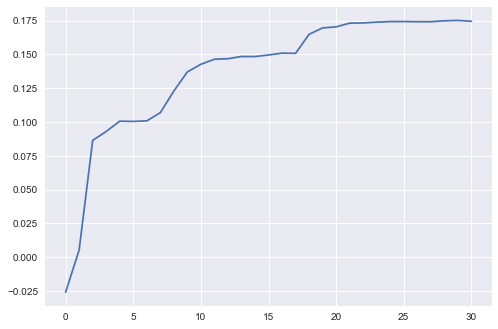

Optimal performance of  0.175102343817407 , for  30  features
Features selected (true if selected, false otherwise): [ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [186]:
#Fig. 8: accurancy as function of the most n significant features
feat_select_linReg(X, y, linreg1)

As shown, the optimal performance occurs when we select the most significant 30 features, which means not using the feature "RH5". Let's train the model without this features:

In [26]:
def tune_selected_linReg_model(X, y):
    fs = SelectKBest(score_func=f_regression, k=30) 
    X_selected = fs.fit_transform(X, y)
    linreg, y_pred = tune_linReg_model (X_selected, y)
    return linreg, y_pred

linreg2, y_pred2 = tune_selected_linReg_model(X, y)

Train accuracy:  0.18067633988016196
Average validation accuracy:  0.17284678185207436
Test accurancy:  0.16966924747189616


### 3.2 Analysis of performance and errors 

#### Scores
While training the model, the following accurancy results were obtained: <br>
- training score: 0.1807
- validation score: 0.1728
- test score: 0.1697

These results show the model isn't performing well  once the score ir very low,
and that basically there is no overfitting, because the train validation score are almost the same. <br>
#### Error analysis
To calculate the error of the model, we will use the Mean Squared Error function (MSE), the Root Mean Squared Error and the Regression Score function (R2). (Note: Best possible R2 score is 1.0 and it can be negative because the model can be arbitrarily worse)

In [8]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def error_results(y_true,y_pred):
    print('r2: ', r2_score(y_true, y_pred))
    print('MSE: ',mean_squared_error(y_true, y_pred))
    print('RMSE: ', mean_squared_error(y_true, y_pred, squared=False))

In [29]:
error_results(y_test,y_pred2)

r2:  0.16966924747189616
MSE:  9064.12165277371
RMSE:  95.20568077994984


#### Learning curves, Bias and Variance

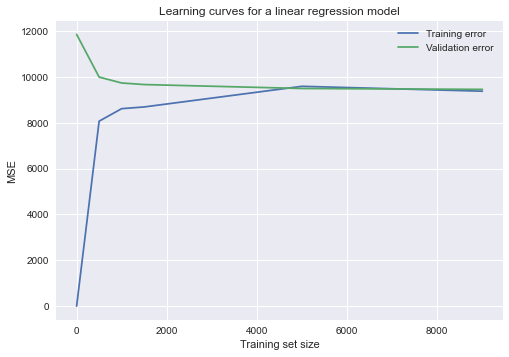

In [79]:
#Fig9: Learning curve for the linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

#training set sizes to use for generating the learning curves
train_sizes = [1, 500, 1000, 1500, 5000,9000]

X_train, X_test, y_train, y_test =split_data_25 (X,y)

#generate the data needed to plot the learning curve
#for scoring,  the intention is to use the mean squared error (MSE) metric, 
#but that’s not a possible parameter for scoring;
#we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later 

train_sizes, train_scores, validation_scores = learning_curve( estimator = LinearRegression(),
                                                                X = X_train,
                                                                y = y_train, 
                                                                train_sizes = train_sizes,
                                                                cv = 5,
                                                                scoring = 'neg_mean_squared_error')

#take the the mean value of each row 
train_scores_mean = -train_scores.mean(axis = 1)
#flip the signs of the error scores
validation_scores_mean = -validation_scores.mean(axis = 1)

#plot the learning curves
import matplotlib.pyplot as plt
plt.figure()
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a linear regression model')
plt.legend()

As the learning curve shows, from around 6000 training data points, the validation MSE stays roughly the same and **both curves  converge**. So, adding more than 6000 instances won’t lead us to a better model.<br>
We also see that this is a **high bias** problem, because both training and validation error are very high, which means the model fails to fit the training data well.<br>
We can estimate the variance by examining the gap between the validation learning curve and training learning curve.
The gap becomes more and more narrow as the training size increases. We can conclude there is a **low variance** because of the narrow the gap.

#### Conclusion 
The learning algorithm suffers from **high bias and low variance**, by underfitting the training data.
Adding more instances to the training data won't help us get a better model.

A solution could be increasing the model’s complexity by training the current model on more features (genereted by PolynomialFeatures).
 

### 3.3 Improving performance
Now, with the suggestion presented in the conclusion above, let's try to improve the performance of our model!

In [30]:
#Generate polynomial features
from sklearn.preprocessing import PolynomialFeatures
X_poly = PolynomialFeatures(2).fit_transform(X)
linreg3, y_pred3 = tune_linReg_model (X_poly, y) 
error_results(y_test, y_pred3)

Train accuracy:  0.40518350899050404
Average validation accuracy:  0.27578458020713503
Test accurancy:  0.3226320583121245
r2:  0.3226320583121245
MSE:  7394.3370258829755
RMSE:  85.99033100228755


A better perfomance was achieved!

## 4. Decision Trees (Random Forest)
### 4.1. Training and Tuning the Model
Decision Trees are developed by recursively partitioning the input data. The tree is composed by **nodes**, that correspond to the features (where the data is split according to a certain parameter), the **branches** that are the features values, and the **leaf nodes** (the final element of the trees) that correspond to the target.  At each step, a new node is added in the tree by selecting the most informative feature and creating subtrees for each posssible value of this feature. To determine the most informative feature, **entropy** and **information gain** are measured. Decision trees can  be applied to regression problems, using the <i>DecisionTreeRegressor</i> class:

In [36]:
#import decision tree regression model
from sklearn.tree import DecisionTreeRegressor

#create a model instance 
tree0 = DecisionTreeRegressor()

#train the model on the training data
tree0.fit(X_train,y_train)

#predict the targets for test data 
y_pred0 = tree0.predict(X_test) 

#calculate the accuracy of the model on the train set and on the test set
train_score0 = tree0.score(X_train, y_train)
test_score0 = tree0.score(X_test, y_test)
print("Training Accuracy :", train_score0)
print("Test Accuracy :", test_score0)

Training Accuracy : 1.0
Test Accuracy : 0.06414503499761393


**Optimize the model (cross validation and hyperparameter tuning)**<br>
Now, let's discover the parameters that optimize the model performance. <br>
Special attention is given to determine the tree complexity (defined with **maximum depth**), because decision tree learning can easily result in overfitting (specially in high dimensional data sets), as comproved by the test and training accurancies obtained above with <i>tree0</i>. <br> 


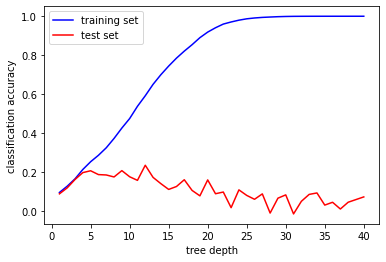

In [37]:
#Fig.10: Accurancy of training and test sets as function of the tree depth
from sklearn.tree import DecisionTreeRegressor
import pylab as pl
%matplotlib inline

training_errors = np.zeros(40)
test_errors = np.zeros(40)

for n in range(40):
    tree = DecisionTreeRegressor(max_depth=n+1) 
    tree.fit(X_train,y_train) 
    training_errors[n] = tree.score(X_train,y_train) 
    test_errors[n] = tree.score(X_test,y_test) 
    

pl.figure()
pl.plot(np.arange(1,41),training_errors,c='b',label='training set')
pl.plot(np.arange(1,41),test_errors,c='r',label='test set')
pl.xlabel("tree depth")
pl.ylabel("classification accuracy")
pl.legend()
pl.show()

From figure 10, we observe that for tree depths bigger than 4, the accurancy of the training and test sets are different due to overfitting. The test accurancy as a maximum around 6 and then decreases  with some oscilations. In conclusion,  **the best tree depth is between 4 and 6**.

In [40]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [3, 4, 5, 6],
           "min_samples_leaf":[0.5,1,2,3],
             "min_weight_fraction_leaf":[0.1,0.2,0.3],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[6,7,8],
            "ccp_alpha":[0, 0.001, 0.01]
           }

model=GridSearchCV(DecisionTreeRegressor(),
                   param_grid=parameters,
                   scoring='r2',
                   cv=tscv)

model.fit(X_train,y_train)
train_score = model.best_score_
#Print  the tuned-hyperparameters and the training accuracy
print("Tuned Hyperparameters :", model.best_params_)
print("Training Accuracy :", train_score)

Tuned Hyperparameters : {'ccp_alpha': 0, 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 8, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
Training Accuracy : 0.16982626602714346


### Random Forest
Even with tuned-hyperparameters, the accurancy is very low (0.17), and is predictable that even if we train more the model, the accurancy won't improve significally because the **predictions come from a single decision tree** that don’t make accurate predictions on new data.<br>
So instead of continuing using the traditional Decision Tree, let's use a **Random forest**. Random forests combine the outputs of **multiple decision trees** models and like this, the performance increases and the variance issues reduce. <br>
Random forest can  be applied to regression problems using the <i>DecisionTreeRegressor</i>:

In [85]:
#import random forest regression model
from sklearn.ensemble import RandomForestRegressor

#create a model instance 
tree1 = RandomForestRegressor()

#train the model on the training data
tree1.fit(X_train,y_train)

#predict the targets for test data 
y_pred1 = tree1.predict(X_test) 

#calculate the accuracy of the model on the train set and on the test set
train_score1 = tree1.score(X_train, y_train)
test_score1 = tree1.score(X_test, y_test)
print("Training Accuracy :", train_score1)
print("Test Accuracy :", test_score1)

Training Accuracy : 0.9319388160864939
Test Accuracy : 0.4946325669994769


Now let's set a range for the **tree depth** and **number of estimators** (i.e., the number of trees in the forest), to helps us with the hyperparameter tuning.

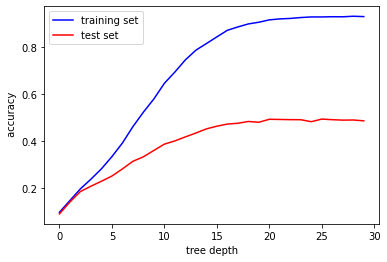

In [42]:
#Fig.11: Accurancy of training and test sets as function of the tree depth

training_errors = np.zeros(30)
test_errors = np.zeros(30)

ind=0
for n in range(30):
    forest = RandomForestRegressor(max_depth=n+1)
    forest = forest.fit(X_train, y_train)
    training_errors[ind] = forest.score(X_train,y_train)
    test_errors[ind] = forest.score(X_test,y_test)
    ind+=1

pl.figure()
pl.plot(np.arange(30),training_errors,c='b',label='training set')
pl.plot(np.arange(30),test_errors,c='r',label='test set')
pl.xlabel("tree depth")
pl.ylabel(" accuracy")
pl.legend()
pl.show()

The deeper the tree, the more information about the data is catured by the model, so there is a certain point where the model overfits:instead of learning the target function, it learns the detail and noise of the training data. <br>
Figure 11 shows the **model overfits for depth values bigger than 3**, but thar a **maximum test accurancy is obtained around 25**. So lets limit the tree depth to 25, and later we will try to solve the overfiting problem.

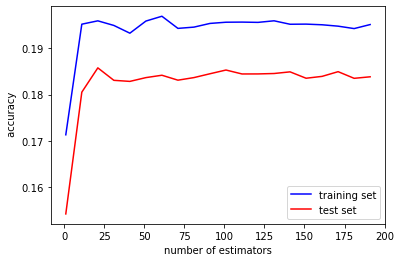

In [43]:
#Fig.12: Accurancy of training and test sets as function of the number of estimators 

training_errors = np.zeros(20)
test_errors = np.zeros(20)

ind=0
for n in range(1,201,10):
    forest = RandomForestRegressor(n_estimators=n,max_depth=3)
    forest = forest.fit(X_train, y_train)
    training_errors[ind] = forest.score(X_train,y_train)
    test_errors[ind] = forest.score(X_test,y_test)
    ind+=1

pl.figure()
pl.plot(np.arange(1,201,10),training_errors,c='b',label='training set')
pl.plot(np.arange(1,201,10),test_errors,c='r',label='test set')
pl.xlabel("number of estimators")
pl.ylabel(" accuracy")
pl.legend()
pl.show()

In general, the more trees that are used, the better the results. However, **as the number of trees increases, the computational cost increases** and at a certain point, the benefits in a accurancy from adding more trees won't compensate the cost in computation time for these additional trees.<br>
From figure 12, we see that is  **maximal test accurancy around 100**.

In [13]:
#Hyperparameter tuning for Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
parameters={'max_depth': [ 20, 30],
             'n_estimators': [100, 120, 140, 170],
           }

model=GridSearchCV(RandomForestRegressor(),
                   param_grid=parameters,
                   scoring='r2',
                   cv=tscv)

model.fit(X_train,y_train)
train_score = model.best_score_
#Print  the tuned-hyperparameters and the training accuracy
print("Tuned Hyperparameters :", model.best_params_)
print("Training Accuracy :", train_score)

Tuned Hyperparameters : {'max_depth': 30, 'n_estimators': 120}
Training Accuracy : 0.4341838734441727


In [9]:
#train the model with the best hyper parameters
#with all the features
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
def tune_tree_model (X, y):
    #split the data
    X_train, X_test, y_train, y_test =split_data_25 (X,y)

    #TRAIN: build the model with the values of the hyperparameters returned by the GridSearchCV() function
    tree = RandomForestRegressor(
                             max_depth=30,
                             n_estimators=120)

    tree.fit(X_train,y_train)
    train_score = tree.score(X_train, y_train)
    print("Train accuracy: ",train_score)

    #VALIDATION: perform cross validation with TimeSeriesSplit 5 folders
    scores = cross_val_score(tree, X_train, y_train, cv=tscv)
    val_score = scores.mean()
    print("Average validation accuracy: ", val_score)

    #TEST: predictions on the test set
    y_pred = tree.predict(X_test)
    test_score = tree.score(X_test, y_test)
    print("Test accurancy: ", test_score)
    
    return tree, y_pred
tree2, y_pred2 = tune_tree_model (X, y)

Train accuracy:  0.9326415776288073
Average validation accuracy:  0.43046216419801064
Test accurancy:  0.49582289996212037


**Selecting the features**<br>
Now, let's identify the most important features, create a new dataset containing only those features and train the tuned model on this new dataset.

In [70]:
from sklearn.feature_selection import SelectFromModel
#identify the most important features (with importance of more than 0.02)
sfm = SelectFromModel(tree2, threshold=0.02)

# Train the selector
sfm.fit(X, y)

# Print the names of the most important features
print("Features selected (true if selected, false otherwise):",sfm.get_support())

Features selected (true if selected, false otherwise): [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False  True False False]


In [19]:
#train the model with the best hyper parameters
#with feature selection
def tune_selected_tree_model(X, y):
    X_selected = sfm.fit_transform(X, y)
    tree, y_pred = tune_tree_model (X_selected, y)
    return tree, y_pred

tree3, y_pred3 = tune_selected_tree_model(X, y)


Train accuracy:  0.9332313132899333
Average validation accuracy:  0.4430736816193984
Test accurancy:  0.4965041884896926


### 4.2. Analysis of performance and errors
#### Scores
While training the model, the following accurancy results were obtained: <br>
- training score: 0.933
- validation score: 0.4408
- test score: .50363

These results show the model is performing better than the Linear regression model, but  the score is still low,
and that is overfitting, because the train validation is close to 1 (the model fits perfectly the training data) but the validation score is 0.4 (the model didn't learn the concept). <br>
#### Error analysis

In [20]:
error_results(y_test, y_pred3)

r2:  0.4965041884896926
MSE:  5496.300448100025
RMSE:  74.13703830137825


#### Learning curves, Bias and Variance

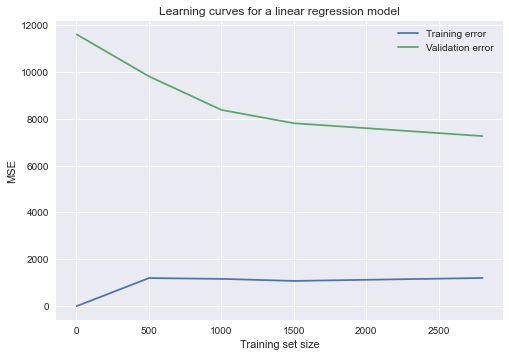

In [57]:
#Fig. 13: Learning curve for the random forest

from sklearn.model_selection import learning_curve

#training set sizes to use for generating the learning curves
train_sizes = [1, 500, 1000, 1500, 2800]

X_train, X_test, y_train, y_test =split_data_25 (X,y)

#generate the data needed to plot the learning curve
#for scoring,  the intention is to use the mean squared error (MSE) metric, 
#but that’s not a possible parameter for scoring;
#we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later 
train_sizes, train_scores, validation_scores = learning_curve( estimator = RandomForestRegressor(max_depth=30,n_estimators=120),
                                                                X = X_train,
                                                                y = y_train, 
                                                                train_sizes = train_sizes, 
                                                                 cv = tscv,
                                                                scoring = 'neg_mean_squared_error')

#take the the mean value of each row 
train_scores_mean = -train_scores.mean(axis = 1)
#flip the signs of the error scores
validation_scores_mean = -validation_scores.mean(axis = 1)

#plot the learning curves
import matplotlib.pyplot as plt
plt.figure()
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a linear regression model')
plt.legend()

We can see from figure 13 that the training and test scores **have not converged** yet, and we have an **high variance** because of the big gap between the validation learning curve and training learning curve. To solve this issue and achive a better model we can add more instances.<br>
We also see that this is a **high bias** problem, because both training and validation error are very high, which means the model fails to fit the training data well.

### 4.3. Improving performance
The model suffers from high bias and high variance, by overfitting the training data. To solve this we can add new features, however that would be worse for the variance. To solve the variance problem, we can reduce the magnitude of the higher-order features by Regularization. Regularization in decision trees may occur by limiting the maximum depth of the tree.

In [73]:
from sklearn.ensemble  import RandomForestRegressor
def improved_tree_model (X, y):
    #feat selection
    X_selected = sfm.fit_transform(X, y)
    
    #split the data
    X_train, X_test, y_train, y_test =split_data_25 (X_selected,y)

    #TRAIN: build the model with the values of the hyperparameters returned by the GridSearchCV() function
    tree = RandomForestRegressor(
                             max_depth=25,
                             n_estimators=110)

    tree.fit(X_train,y_train)
    train_score = tree.score(X_train, y_train)
    print("Train accuracy: ",train_score)

    #VALIDATION: perform cross validation with TimeSeriesSplit 5 folders
    scores = cross_val_score(tree, X_train, y_train, cv=tscv)
    val_score = scores.mean()
    print("Average validation accuracy: ", val_score)

    #TEST: predictions on the test set
    y_pred = tree.predict(X_test)
    test_score = tree.score(X_test, y_test)
    print("Test accurancy: ", test_score)
    
    return tree, y_pred

tree4, y_pred4 = improved_tree_model (X, y)

Train accuracy:  0.9355169853490726
Average validation accuracy:  0.45924203385227463
Test accurancy:  0.5465918363846317


In [74]:
error_results(y_test, y_pred4)

r2:  0.5465918363846317
MSE:  4949.529739633874
RMSE:  70.35289432307582


A better performance was achived!


## 5. Neural Network Model
Neural Networks (NN) are computational models inspired by biological neural structures. We will start by consider the Multi-Layer Perceptron neural network model (MLP). This model is composed by an input layer, one or more hidden layers and an output layer. Data is processed by passing it sequentially through each layer from input to output. In each layer the outputs from the previous layer are multiplied with connection weights and passed through an activation function (that is typically a sigmoid function). The network can be trained by optimizing the weights and by selecting the optimal number of hiden layers and the number of neurons in it.<br>

In [78]:
#import nn mpl model
from sklearn.neural_network import MLPRegressor

#create a model instance 
net0 =MLPRegressor(max_iter=2000) #with the default value of max_int, the optimization don't converge

#train the model on the training data
net0.fit(X_train,y_train)

#predict the targets for test data 
y_pred0 = net0.predict(X_test) 

#calculate the accuracy of the model on the train set and on the test set
train_score0 = net0.score(X_train, y_train)
test_score0 = net0.score(X_test, y_test)
print("Training Accuracy :", train_score0)
print("Test Accuracy :", test_score0)


Training Accuracy : 0.24072447641715877
Test Accuracy : 0.22216538289226162


### 5.1. Training and Tuning the Model
Now, let's discover the parameters that optimize the model performance. Before doing the GridSearch, let's anaçyze with detail the effect of the number of neurons in the hidden layer.

[0.14116682 0.22906082 0.25450928 0.22076875 0.26391311 0.25070134
 0.2730683  0.24478686 0.24576226 0.24781845 0.22814898] [0.15072966 0.25362888 0.27802186 0.24920648 0.30382767 0.29817384
 0.32306882 0.26952712 0.28877335 0.30062854 0.25754811]


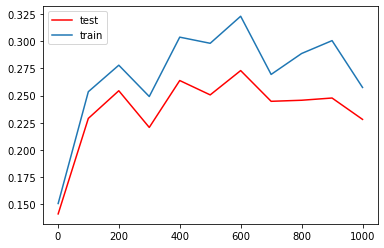

In [88]:
#Fig. 14: train and test accurancies as function of the number of neurons in each layer
numhidden = [1,100,200,300,400,500,600,700,800,900,1000]
restest = np.zeros(len(numhidden))
restrain = np.zeros(len(numhidden))

ind=0
#ideally you would run this multiple times and report average results 
#(or use cross-validation, see later)
for h in numhidden:
    net = MLPRegressor(hidden_layer_sizes=h, max_iter=4000) #with the default value of max_int, the optimization don't conver
    net.fit(X_train,y_train)
    restest[ind] += net.score(X_test,y_test)
    restrain[ind] += net.score(X_train,y_train)
    ind +=1

print(restest, restrain)
#plot performance
pl.figure()
pl.plot(numhidden,restest,'r',label='test') 
pl.plot(numhidden,restrain,label='train')
pl.legend()
pl.show()

As the plot shows maximum accurancy scores is reached around 600 layers.

In [11]:

#Hyperparameter tuning
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
parameters= { 
            'hidden_layer_sizes': [550,600,650],
              }


model=GridSearchCV(MLPRegressor(max_iter=4000),
                   param_grid=parameters,
                   scoring='r2',
                   cv=tscv)

model.fit(X_train,y_train)
train_score = model.best_score_
#Print  the tuned-hyperparameters and the training accuracy
print("Tuned Hyperparameters :", model.best_params_)
print("Training Accuracy :", train_score)

Tuned Hyperparameters : {'hidden_layer_sizes': 600}
Training Accuracy : 0.20723880668102646


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
def net_tuned_model (X, y):
    #split the data
    X_train, X_test, y_train, y_test =split_data_25 (X,y)

    #TRAIN: build the model with the values of the hyperparameters returned by the GridSearchCV() function
    net = MLPRegressor(max_iter=4000, hidden_layer_sizes=600)

    net.fit(X_train,y_train)
    train_score = net.score(X_train, y_train)
    print("Train accuracy: ",train_score)

    #VALIDATION: perform cross validation with TimeSeriesSplit 5 folders
    scores = cross_val_score(net, X_train, y_train, cv=tscv)
    val_score = scores.mean()
    print("Average validation accuracy: ", val_score)

    #TEST: predictions on the test set
    y_pred = net.predict(X_test)
    test_score = net.score(X_test, y_test)
    print("Test accurancy: ", test_score)
    
    return net, y_pred

net1, y_pred1 = net_tuned_model(X, y)

Train accuracy:  0.216840909355686
Average validation accuracy:  0.2008714021213292
Test accurancy:  0.1832521049774779


**Features Selection**<br>
We are going to perform feature selection in the same way we did for the linear regression model, but this time, because the computational cost of this model is much higher, we won't verify the performance of the model for less than 24 features selected:

In [16]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def feat_select_net(X, y, model):
  
    num_feat= X.shape[1] 
    v_scores = np.zeros(num_feat)
    for i in range(23,num_feat):
        #define feature selection
        fs = SelectKBest(score_func=f_regression, k=i+1)
        # apply feature selection
        X_selected = fs.fit_transform(X, y)

        X_train, X_test, y_train, y_test = split_data_25 (X_selected,y)

        model.fit(X_train,y_train)
        scores = cross_val_score(model, X_train, y_train, cv=tscv)
        v_scores[i] = scores.mean()
    
    
    plt.figure()
    plt.plot(np.arange(num_feat),v_scores)
    plt.show()

    n_best_features = np.argmax(v_scores)
    print("Optimal performance of ", v_scores[n_best_features],", for ", n_best_features+1, " features")
    
    #to know which features were removed
    fs = SelectKBest(score_func=f_regression, k=n_best_features+1)
    X_selected = fs.fit_transform(X, y)
    print("Features selected (true if selected, false otherwise):",fs.get_support())

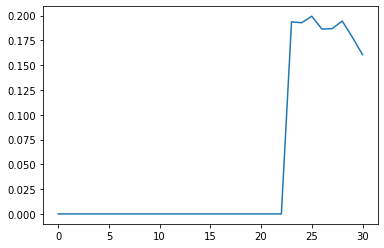

Optimal performance of  0.19933674473806168 , for  26  features
Features selected (true if selected, false otherwise): [ True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False False  True  True  True  True]


In [17]:
feat_select_net(X, y, net1)

There is a maximum value for 26 features!

In [20]:
def tune_selected_net_model(X, y):
    fs = SelectKBest(score_func=f_regression, k=26) 
    X_selected = fs.fit_transform(X, y)
    net, y_pred = net_tuned_model (X_selected, y)
    return net, y_pred

net2, y_pred2 = tune_selected_net_model(X, y)

Train accuracy:  0.26249125826293895
Average validation accuracy:  0.1897227831088675
Test accurancy:  0.24164058859806348


### 5.2. Analysis of performance and errors
#### Scores
While training the model, the following accurancy results were obtained: <br>
- training score: 0.2624
- validation score:  0.1897
- test score: 0.2416

These results show the model is performing worse than the Random Forest. The score is  low but there isn't much overfitting. <br>
#### Error analysis

In [21]:
error_results(y_test, y_pred2)

r2:  0.24164058859806348
MSE:  8278.462456730895
RMSE:  90.98605638629962


#### Learning curves, Bias and Variance

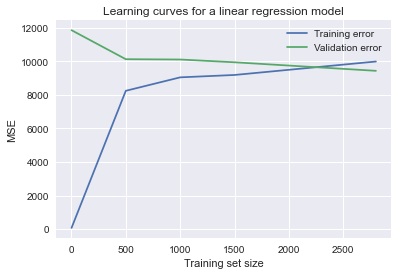

In [22]:
#Fig14: Learning curve for the neural net

from sklearn.model_selection import learning_curve

#training set sizes to use for generating the learning curves
train_sizes = [1, 500, 1000, 1500, 2800]

X_train, X_test, y_train, y_test =split_data_25 (X,y)

#generate the data needed to plot the learning curve
#for scoring,  the intention is to use the mean squared error (MSE) metric, 
#but that’s not a possible parameter for scoring;
#we’ll use the nearest proxy, negative MSE, and we’ll just have to flip signs later 
train_sizes, train_scores, validation_scores = learning_curve( estimator = MLPRegressor(max_iter=4000, hidden_layer_sizes=600),
                                                                X = X_train,
                                                                y = y_train, 
                                                                train_sizes = train_sizes, 
                                                                 cv = tscv,
                                                                scoring = 'neg_mean_squared_error')

#take the the mean value of each row 
train_scores_mean = -train_scores.mean(axis = 1)
#flip the signs of the error scores
validation_scores_mean = -validation_scores.mean(axis = 1)

#plot the learning curves
import matplotlib.pyplot as plt
plt.figure()
plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE')
plt.xlabel('Training set size')
plt.title('Learning curves for a linear regression model')
plt.legend()

As the learning curve shows, from around 2300 training data points, the validation MSE stays  both curves converge. So, adding more than that number of instances won’t lead us to a better model.
We also see that this is a high bias problem, because both training and validation error are very high, which means the model fails to fit the training data well. As the training size increases, the  gap between the validation learning curve becomes more and more narrow , so we can conclude there is a low variance.
### Conclusion
The learning algorithm suffers from high bias and low variance. A solution to solve the high bias could be increasing the model’s complexity by training the current model on more features.<br>
However, this probably won't led us to get a better performance than the previous model because **the model isn't capable of learning order dependence** in sequence prediction problems, like this one. A solution could be to use a **time recurrent neural network model** . This type of networks are suitable for processing and predicting events in time series. The neurons in the hidden layer receive information from the input layer and also receive information that neurons have perceived from the last moment. This is very convinient for us once our features are temporally autocorrelated.

## 6. Evaluating Different Hypotheses & Model selection 
The following table shows the final results for the models trained . 



| Model || Train accuracy || Average validation accuracy || R2 (Test accuracy)|| MSE ||RMSE |
| :- || :- || :- || :- || :-|| :-|
| Linear Regression || 0.4052 ||  0.2758 || 0.3226 || 7394.34 ||85.99|
| Random Forest || 0.9355|| 0.4592||   0.5466 ||  4949.53 ||  70.35 |
| Multi-Layer Perceptron ||  0.2624||  0.1897 || 0.2416|| 8278.46 || 90.99 ||



The Linear Model do not capture the non-linear inter-variable relationships, it is too simple to fit complicated real-world data properly. <br>
The Multi-Layer Perceptron is not the best choice because this model isn't capable of learning order dependence. 
Some concepts may not be easily representable with a decision tree, however, the Random Forest model showed the best performance and because of this is the model selected! <br> 

## 7. Kaggle submission

In [75]:
#preparing the test data for the model 

def handle_data(df):
    
    #Creating a new feature from the time variable
    X, num_feat = create_time_features(df)
    
    #remove repeated feature
    X, num_feat = remove_repeated_feat(X, num_feat)
    

    #features selectiom
    X = np.delete(X, 30, 1)
    X = np.delete(X, 29, 1)
    X = np.delete(X, 27, 1)
    X = np.delete(X, 26, 1)
    X = np.delete(X, 25, 1)
    return  X
test_data = pd.read_csv("./test.csv")
X_kaggle = handle_data(test_data)

In [76]:
predictions = tree4.predict(X_kaggle)
len(predictions)

#generate a unique file name
def generate_unique_filename(basename, file_ext):
    """Adds a timestamp to filenames for easier tracking of submissions, models, etc."""
    timestamp = time.strftime("%Y%m%d-%H%M%S", time.localtime())
    return basename + '_' + timestamp + '.' + file_ext

In [ ]:
#create padas dataframe
submission = pd.DataFrame(data=predictions, columns=["Appliances"])
submission.index.name = "Id"
submission.head()
submission.tail()

In [ ]:
submission.to_csv(generate_unique_filename("submission", "csv"))